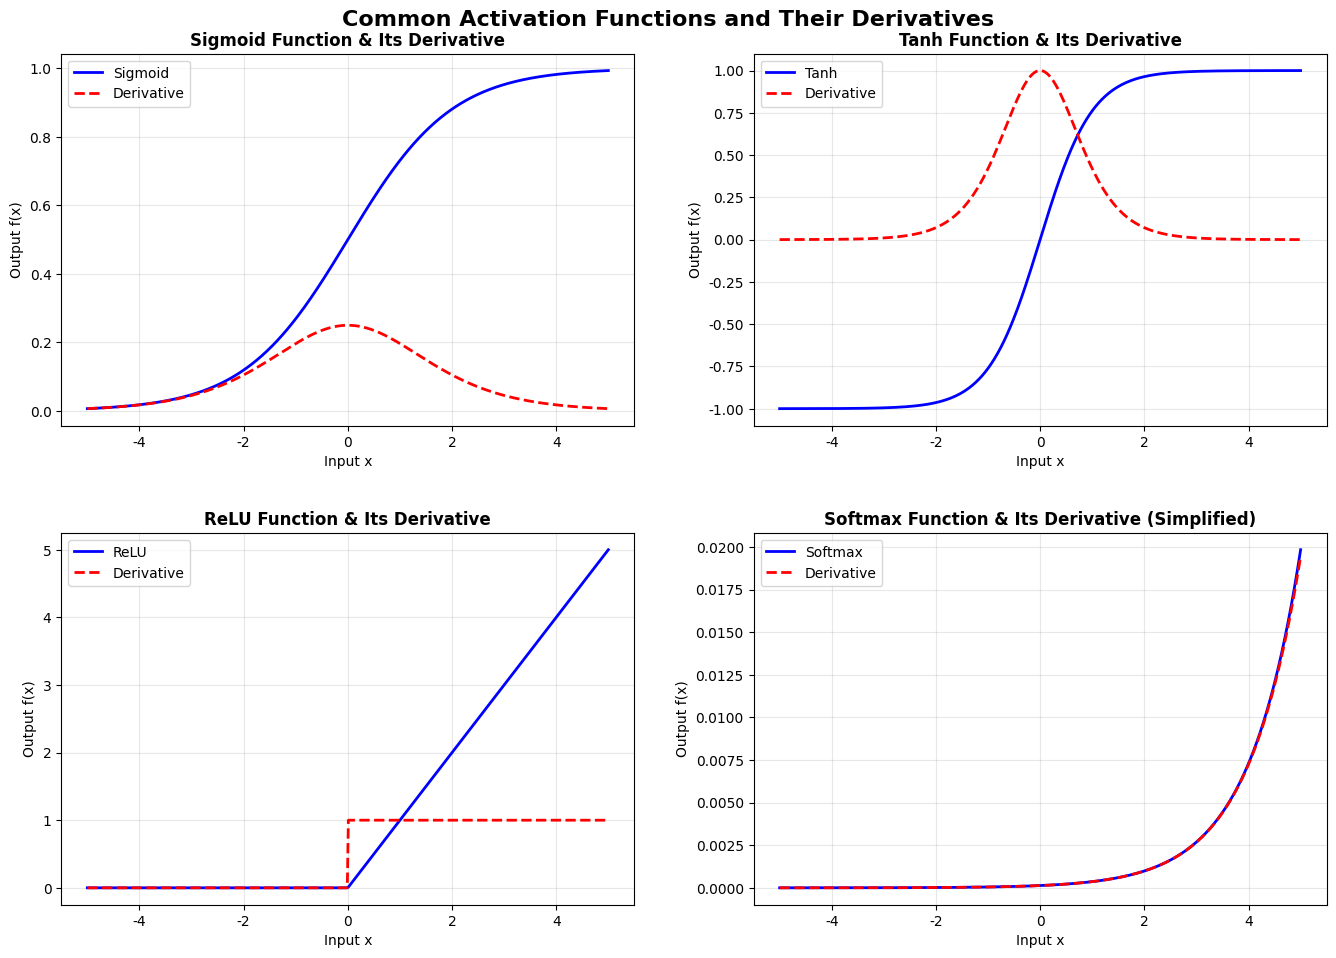

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 创建x值范围
x = np.linspace(-5, 5, 500)

# 定义激活函数及其导数
def sigmoid(x):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of Sigmoid function"""
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    """Tanh function"""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivative of Tanh function"""
    return 1 - np.tanh(x)**2

def relu(x):
    """ReLU function"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU function"""
    return np.where(x > 0, 1, 0)

def softmax(x):
    """Softmax function (simplified for visualization)"""
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def softmax_derivative(x):
    """Derivative of Softmax function (simplified)"""
    s = softmax(x)
    return s * (1 - s)

# 创建图形和子图
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 设置每个子图的标题
titles = ['Sigmoid Function & Its Derivative', 
          'Tanh Function & Its Derivative', 
          'ReLU Function & Its Derivative', 
          'Softmax Function & Its Derivative (Simplified)']

# 1. Sigmoid函数子图
axs[0, 0].plot(x, sigmoid(x), 'b-', linewidth=2, label='Sigmoid')
axs[0, 0].plot(x, sigmoid_derivative(x), 'r--', linewidth=2, label='Derivative')
axs[0, 0].set_title(titles[0], fontsize=12, fontweight='bold')
axs[0, 0].set_xlabel('Input x')
axs[0, 0].set_ylabel('Output f(x)')
axs[0, 0].grid(True, alpha=0.3)
axs[0, 0].legend()

# 2. Tanh函数子图
axs[0, 1].plot(x, tanh(x), 'b-', linewidth=2, label='Tanh')
axs[0, 1].plot(x, tanh_derivative(x), 'r--', linewidth=2, label='Derivative')
axs[0, 1].set_title(titles[1], fontsize=12, fontweight='bold')
axs[0, 1].set_xlabel('Input x')
axs[0, 1].set_ylabel('Output f(x)')
axs[0, 1].grid(True, alpha=0.3)
axs[0, 1].legend()

# 3. ReLU函数子图
axs[1, 0].plot(x, relu(x), 'b-', linewidth=2, label='ReLU')
axs[1, 0].plot(x, relu_derivative(x), 'r--', linewidth=2, label='Derivative')
axs[1, 0].set_title(titles[2], fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel('Input x')
axs[1, 0].set_ylabel('Output f(x)')
axs[1, 0].grid(True, alpha=0.3)
axs[1, 0].legend()

# 4. Softmax函数子图
axs[1, 1].plot(x, softmax(x), 'b-', linewidth=2, label='Softmax')
axs[1, 1].plot(x, softmax_derivative(x), 'r--', linewidth=2, label='Derivative')
axs[1, 1].set_title(titles[3], fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel('Input x')
axs[1, 1].set_ylabel('Output f(x)')
axs[1, 1].grid(True, alpha=0.3)
axs[1, 1].legend()

# 调整子图间距
plt.tight_layout(pad=3.0)

# 添加总标题
plt.suptitle('Common Activation Functions and Their Derivatives', fontsize=16, y=0.98, fontweight='bold')

# 显示图形
plt.show()

Gradient Descent Algorithm Demonstration

Standard Gradient Descent
Converged after 81 iterations


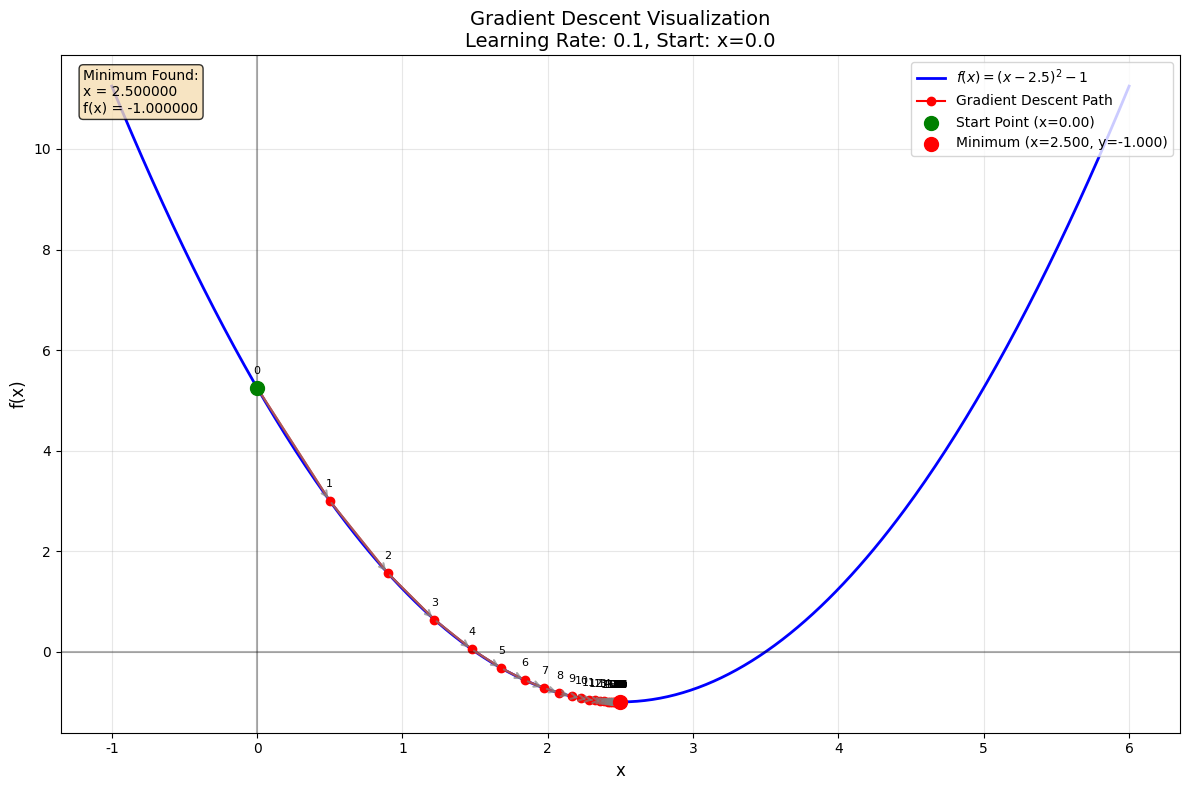

GRADIENT DESCENT ALGORITHM RESULTS
Function: f(x) = (x-2.5)^2 - 1
Derivative: f'(x) = 2*(x-2.5)
Starting point: x = 0.0
Learning rate: 0.1
Number of iterations: 81
Minimum found at: x = 2.500000
Minimum value: f(x) = -1.000000
Theoretical minimum: x = 2.5, f(x) = -1

Iteration Details:
------------------------------------------------------------
Iteration  x               f(x)            Gradient       
------------------------------------------------------------
0          0.000000        5.250000        -5.000000      
1          0.500000        3.000000        -4.000000      
2          0.900000        1.560000        -3.200000      
3          1.220000        0.638400        -2.560000      
4          1.476000        0.048576        -2.048000      
5          1.680800        -0.328911       -1.638400      
6          1.844640        -0.570503       -1.310720      
7          1.975712        -0.725122       -1.048576      
8          2.080570        -0.824078       -0.838861      
9

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define quadratic function and its derivative
def quadratic_function(x):
    """Target function: f(x) = (x-2.5)^2 - 1"""
    return (x - 2.5) ** 2 - 1

def gradient(x):
    """Gradient (derivative) of the function: f'(x) = 2*(x-2.5)"""
    return 2 * (x - 2.5)

def gradient_descent(start_x=0.0, learning_rate=0.1, max_iterations=100, tolerance=1e-8):
    """
    Execute gradient descent algorithm
    
    Parameters:
    start_x: starting point
    learning_rate: learning rate
    max_iterations: maximum number of iterations
    tolerance: convergence tolerance
    
    Returns:
    x_history: history of x values
    y_history: history of function values
    """
    x = start_x
    x_history = [x]
    y_history = [quadratic_function(x)]
    
    for i in range(max_iterations):
        # Calculate gradient
        grad = gradient(x)
        
        # Update parameter
        new_x = x - learning_rate * grad
        
        # Save history
        x_history.append(new_x)
        y_history.append(quadratic_function(new_x))
        
        # Check convergence
        if abs(new_x - x) < tolerance:
            print(f"Converged after {i+1} iterations")
            break
            
        x = new_x
    else:
        print(f"Reached maximum iterations: {max_iterations}")
    
    return x_history, y_history

def visualize_gradient_descent(x_history, y_history, learning_rate, start_x):
    """
    Visualize the gradient descent process
    """
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Generate function curve data
    x_vals = np.linspace(-1, 6, 400)
    y_vals = quadratic_function(x_vals)
    
    # Plot function curve
    plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='$f(x) = (x-2.5)^2 - 1$')
    
    # Plot gradient descent path
    plt.plot(x_history, y_history, 'ro-', linewidth=1.5, markersize=6, 
             label='Gradient Descent Path')
    
    # Add iteration number labels
    for i, (x, y) in enumerate(zip(x_history, y_history)):
        if i < len(x_history) - 1:
            plt.annotate(f'{i}', (x, y), textcoords="offset points", 
                        xytext=(0, 10), ha='center', fontsize=8)
    
    # Mark starting point and minimum point
    plt.scatter([x_history[0]], [y_history[0]], color='green', s=100, 
                zorder=5, label=f'Start Point (x={x_history[0]:.2f})')
    plt.scatter([x_history[-1]], [y_history[-1]], color='red', s=100, 
                zorder=5, label=f'Minimum (x={x_history[-1]:.3f}, y={y_history[-1]:.3f})')
    
    # Add gradient direction arrows
    for i in range(len(x_history)-1):
        plt.annotate('', xy=(x_history[i+1], y_history[i+1]), 
                    xytext=(x_history[i], y_history[i]),
                    arrowprops=dict(arrowstyle='->', color='gray', lw=1.5, alpha=0.7))
    
    # Set plot properties
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.title(f'Gradient Descent Visualization\nLearning Rate: {learning_rate}, Start: x={start_x}', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Display minimum point coordinates
    min_x = x_history[-1]
    min_y = y_history[-1]
    plt.text(0.02, 0.98, f'Minimum Found:\nx = {min_x:.6f}\nf(x) = {min_y:.6f}', 
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed information
    print("=" * 60)
    print("GRADIENT DESCENT ALGORITHM RESULTS")
    print("=" * 60)
    print("Function: f(x) = (x-2.5)^2 - 1")
    print("Derivative: f'(x) = 2*(x-2.5)")
    print(f"Starting point: x = {start_x}")
    print(f"Learning rate: {learning_rate}")
    print(f"Number of iterations: {len(x_history)-1}")
    print(f"Minimum found at: x = {min_x:.6f}")
    print(f"Minimum value: f(x) = {min_y:.6f}")
    print("Theoretical minimum: x = 2.5, f(x) = -1")
    print("=" * 60)
    
    # Print iteration details
    print("\nIteration Details:")
    print("-" * 60)
    print(f"{'Iteration':<10} {'x':<15} {'f(x)':<15} {'Gradient':<15}")
    print("-" * 60)
    for i, (x, y) in enumerate(zip(x_history, y_history)):
        if i < len(x_history) - 1:
            grad = gradient(x)
        else:
            grad = 0
        print(f"{i:<10} {x:<15.6f} {y:<15.6f} {grad:<15.6f}")

# Main program
if __name__ == "__main__":
    print("Gradient Descent Algorithm Demonstration")
    print("=" * 50)
    
    # Standard gradient descent
    print("\nStandard Gradient Descent")
    x_history, y_history = gradient_descent(start_x=0.0, learning_rate=0.1)
    visualize_gradient_descent(x_history, y_history, learning_rate=0.1, start_x=0.0)
